<h1>Banana Function</h1>

In [5]:
# gradient parameters for Banana Function
import numpy as np
def partDer_x1(x1, x2):
    dx1 = 400* x1**3 + (2 - 400 * x2) * x1 - 2
    return dx1
    
def partDer_x2(x1, x2):    
    dx2 = 200 *(x2 - x1**2)
    return dx2

def gradient_v(x1, x2):
    grad = np.array([partDer_x1(x1, x2), partDer_x2(x1, x2)])
    return grad

#gradient(1, 2)

In [6]:
# gradient vector with unlimited nb of variables
def gradient_v(varList, derList):
    # tuples is a list of tuples of variables and partial derivative functions
    grad = list()
    #eachFct is the above partDer function
    for eachFct in derList:
        df = eachFct(*varList)
        grad.append(df) 
    '''    
    #Same with list comprehension
    grad = np.array([eachFct(*varList) for eachFct in derList])
    return(grad)
    '''
    return np.array(grad)

#gradient_v([1, 2],[partDer_x1, partDer_x2])

<h1>Descente de Gradient </h1>

In [63]:
# here are the model parameters
convg_threshold = 0.000001
start_pt = [1.2, -0.8]
rate = 0.0001 # Learning rate (step)

In [64]:
# initialisation of varibles (unchanged)
cost_fct = lambda x1, x2 : 100 * (x2 - x1**2)**2 + (1-x1)**2
cost = cost_fct(*start_pt)  # * is used to "unpack" the list of variable for the cost function
delta_cost = 1
run_id = 1

In [65]:
# variable constraints
upper_b = 5
lower_b = -5

Iteration 1 | [ 1.09244 -0.7552 ] cost: 379.72254407786227
Iteration 2 | [ 1.00727127 -0.7162275 ] cost: 299.574846502363
Iteration 3 | [ 0.93753349 -0.68161104] cost: 243.54492049926301
Iteration 4 | [ 0.87902214 -0.65039944] cost: 202.5301209036473
Iteration 5 | [ 0.8290096  -0.62193785] cost: 171.4283327801851
Iteration 6 | [ 0.7856304  -0.59575395] cost: 147.1753530511054
Iteration 7 | [ 0.74755546 -0.57149457] cost: 127.82916372909503
Iteration 8 | [ 0.71380646 -0.5488879 ] cost: 112.10456345793119
Iteration 9 | [ 0.68364377 -0.52771975] cost: 99.12020467874272
Iteration 10 | [ 0.6564956  -0.50781798] cost: 88.25337477535004
Iteration 11 | [ 0.63191146 -0.48904189] cost: 79.05276904935353
Iteration 12 | [ 0.60953064 -0.47127481] cost: 71.18405570480597
Iteration 13 | [ 0.58906018 -0.45441876] cost: 64.39477447748233
Iteration 14 | [ 0.5702592  -0.43839055] cost: 58.491050514502305
Iteration 15 | [ 0.55292747 -0.42311882] cost: 53.321757545625246
Iteration 16 | [ 0.53689689 -0.4085

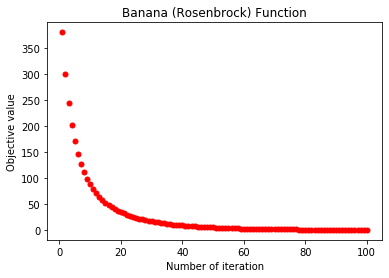

In [66]:
%matplotlib inline
import matplotlib.pyplot as plt
import timeit

start = timeit.default_timer()

# loop of the descent under following conditions:
while (run_id <= 100 and abs(delta_cost) >= convg_threshold) or run_id <= 10:
    grad = gradient_v(start_pt,[partDer_x1, partDer_x2])
    new_pt = np.array(start_pt) - rate * grad
    # handle lower and upper bounds of variables
    new_pt = np.array(list(map(lambda x: min(x, upper_b), new_pt)))
    new_pt = np.array(list(map(lambda x: max(x, lower_b), new_pt)))
    new_cost = cost_fct(*list(new_pt))
    print('Iteration', run_id, '|', new_pt, 'cost:', new_cost)  #print the iteration history
    # plot the cost evolution following iteration
    plt.xlabel('Number of iteration')
    plt.ylabel('Objective value')
    plt.title('Banana (Rosenbrock) Function')
    ax = plt.plot(
        run_id, 
        new_cost, 
        'ro',
        markersize = 5
    )
    # update the current position and cost
    delta_cost = cost - new_cost
    start_pt = new_pt
    cost = new_cost
    run_id += 1
stop = timeit.default_timer()
execution_time = stop - start
print("Program Executed in seconds: ", str(execution_time))

<b>The followings are example codes for single variable problems</b>


In [14]:
np.array(np.array([1, 2]))

array([1, 2])

In [ ]:
# Gradient descent in Python :
# Step 1 : Initialize parameters

In [2]:
cur_x = 3 # The algorithm starts at x=3
rate = 0.01 # Learning rate
precision = 0.000001 #This tells us when to stop the algorithm
previous_step_size = 1 #
max_iters = 100 # maximum number of iterations
iters = 0 #iteration counter
df = lambda x: 2*(x+5) #Gradient of our function 

In [3]:
# Step 2 : Run a loop to perform gradient descent :
# i. Stop loop when difference between x values from 2 consecutive iterations is less than 0.000001 or when number of iterations exceeds 10,000

In [4]:
while previous_step_size > precision and iters < max_iters:
    prev_x = cur_x #Store current x value in prev_x
    cur_x = cur_x - rate * df(prev_x) #Grad descent
    previous_step_size = abs(cur_x - prev_x) #Change in x
    iters = iters+1 #iteration count
    print("Iteration",iters,"\nX value is",cur_x) #Print iterations
    
print("The local minimum occurs at", cur_x)

Iteration 1 
X value is 2.84
Iteration 2 
X value is 2.6832
Iteration 3 
X value is 2.529536
Iteration 4 
X value is 2.37894528
Iteration 5 
X value is 2.2313663744
Iteration 6 
X value is 2.0867390469119997
Iteration 7 
X value is 1.9450042659737599
Iteration 8 
X value is 1.8061041806542846
Iteration 9 
X value is 1.669982097041199
Iteration 10 
X value is 1.5365824551003748
Iteration 11 
X value is 1.4058508059983674
Iteration 12 
X value is 1.2777337898784
Iteration 13 
X value is 1.152179114080832
Iteration 14 
X value is 1.0291355317992152
Iteration 15 
X value is 0.9085528211632309
Iteration 16 
X value is 0.7903817647399662
Iteration 17 
X value is 0.6745741294451669
Iteration 18 
X value is 0.5610826468562635
Iteration 19 
X value is 0.44986099391913825
Iteration 20 
X value is 0.3408637740407555
Iteration 21 
X value is 0.23404649855994042
Iteration 22 
X value is 0.1293655685887416
Iteration 23 
X value is 0.026778257216966764
Iteration 24 
X value is -0.07375730792737258
It